## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].count()
mice_count


1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].nunique()


248

## Summary Statistics

In [10]:
mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviataion": stdev, "SEM": sem})
summary_df






,Mean,Median,Variance,Standard Deviataion,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_tbl_df = clean_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

summary_stats_tbl_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

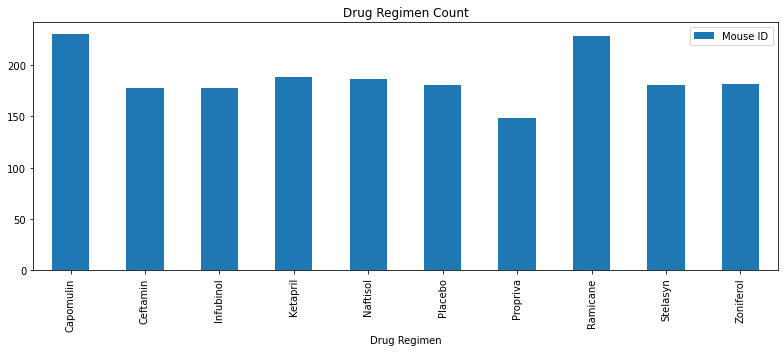

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = pd.DataFrame(clean_mouse_df.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")
drugs_df.plot(kind="bar", figsize=(11,5))
plt.title("Drug Regimen Count")
plt.tight_layout()


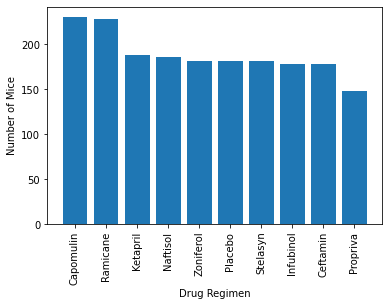

In [14]:
value_counts = clean_mouse_df['Drug Regimen'].value_counts()
plt.bar(value_counts.index.values,value_counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()


In [15]:
gender_data = pd.DataFrame(combined_data.groupby(["Sex"])["Sex"].count())

gender_data = combined_data["Sex"].value_counts()

gender_data.head()

Male      958
Female    935
Name: Sex, dtype: int64

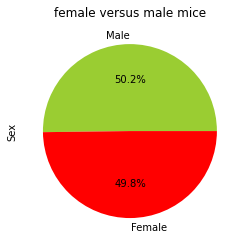

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = combined_data.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
gender_data.head()



#counts.plot(kind="pie",autopct='%1.3f%%')

gender_data.plot.pie(y='Sex',autopct="%1.1f%%",title = "female versus male mice", legend=False, colors = ["yellowgreen", "red"])

plt.show()



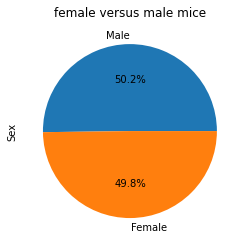

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = combined_data.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.title("female versus male mice")
plt.ylabel("Sex")
plt.show()





## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_vol = clean_mouse_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
tumor_df = tumor_vol.reset_index()
tumor_df



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumor_df.loc[tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(tumor_vol)
    
    
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) 
                  | (tumor_vol > upper_bound)]
    
    #Print IQR & outlier data
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3)for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    
    

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3)for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3)for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3)for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumor volume(mm3)for Ceftamin above 87.67 could be outliers.
Average tumor volume(mm3) for Ceftamin is: 57.75
Number of outliers for Ceftamin 

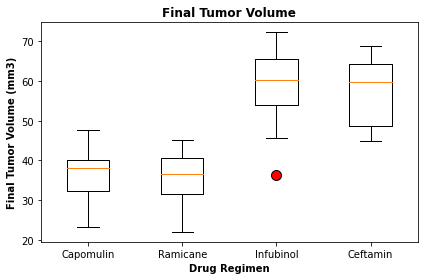

In [23]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, tumor_plot = plt.subplots()
tumor_plot.boxplot(tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

#Set x/y label, title
tumor_plot.set_title('Final Tumor Volume', fontweight='bold')
tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

#Save box plot graph to Images folder
plt.tight_layout()
tumor_plot.figure.savefig('Images')

#Present the box plot chart
plt.show()





## Line and Scatter Plots

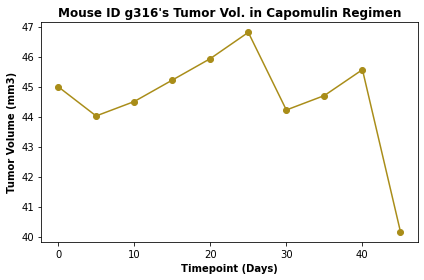

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Generate Capomulin Regimen dataframe
Capomulin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin']

#Choose a Capomulin Regimen mouse and get data of the mouse id
mouse_id = 'g316'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

#Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', color='#a98d19')

#x/y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Regimen", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

#Save line graph in Images
plt.tight_layout()
plt.savefig('Images')

# Present the box plot chart
plt.show()








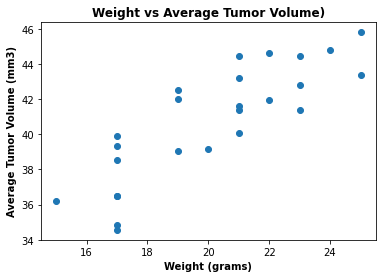

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen for mouse g316
#calculate mean tumor volume & weight
Capomulin = Capomulin_df.groupby('Mouse ID').mean()
mice_weight_mean = Capomulin['Weight (g)']
mice_tumor_mean = Capomulin['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(mice_weight_mean, mice_tumor_mean)

# Set x/y label, title
plt.title('Weight vs Average Tumor Volume)', fontweight='bold')
plt.xlabel('Weight (grams)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images')

# Present the box plot chart
plt.show()



## Correlation and Regression

The correlation between tumor volume and mouse weight is 0.84
The r-squared is: 0.71


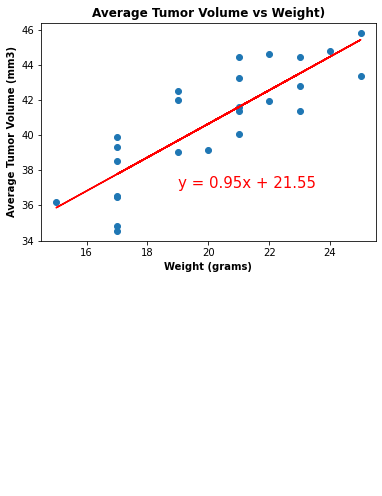

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Define x,y values
x_values = mice_weight_mean
y_values = mice_tumor_mean

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between tumor volume and mouse weight is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=1.0)


# Plot the Annotation in the graph 
plt.annotate(line_equation,(19,37), fontsize=15, color="red")
plt.annotate(f'r-squared = {r_squared}', (15,20), fontsize=11, color="black")

# Define title and x/y labels
plt.title('Average Tumor Volume vs Weight)', fontweight='bold')
plt.xlabel('Weight (grams)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images')

# Present the box plot chart
plt.show()
